In [279]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

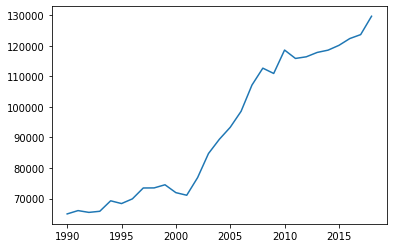

1990     65002.1367
1991     66087.2773
1992     65501.8893
1993     65864.0677
1994     69291.1687
1995     68390.0230
1996     69922.3527
1997     73480.8248
1998     73507.2564
1999     74532.4023
2000     71958.8002
2001     71107.6301
2002     76882.9909
2003     84747.8095
2004     89406.0759
2005     93324.0329
2006     98558.1409
2007    107139.6195
2008    112667.5384
2009    110930.8941
2010    118586.4067
2011    115842.9204
2012    116383.2885
2013    117808.2989
2014    118554.0858
2015    120122.8868
2016    122346.9480
2017    123638.3460
2018    129643.2400
Name: Production (ktoe), dtype: float64

In [280]:
xls = pd.ExcelFile('../data/WorldEnergyBalancesHighlights_final.xlsx')

df = pd.read_excel(xls, 'TimeSeries_1971-2019',header=1,index_col=[0,1,2],usecols="A:C,Z:BB",na_values=['..','c'])
br = df.loc[('Brazil')]

renew = br.loc[('Renewables and waste')]
renew= renew.transpose()

renew['Production (ktoe)'].plot()
plt.show()

renew['Production (ktoe)']

In [281]:
def dickeyF(dados):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(dados, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
def diferencia(serie):
    val = True
    res = pd.Series(index=serie.index[1:])
    ant = 0
    for i in serie.index[1:]:
        if val:
            ant = serie.index[0]
            val = False
        res[i] = serie[i] - serie[ant]
        ant = i
    return res
def difreverse(serie, diferenciado):
    res = diferenciado.copy()
    val = True
    ant = 0
    for i in serie.index[2:]:
        if val:
            ant = serie.index[1]
            val = False
        res[i] = res[i] + serie[ant]
        ant = i
    res = res.append(serie.head(1))
    res = res.append(serie.head(2))
    res.sort_index(inplace=True)
    return res


In [282]:
dickeyF(renew['Production (ktoe)'])

Results of Dickey-Fuller Test:
Test Statistic                  0.451536
p-value                         0.983323
#Lags Used                      0.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64


In [283]:
log = pd.Series(np.log(renew['Production (ktoe)']))

In [284]:
dickeyF(log)

Results of Dickey-Fuller Test:
Test Statistic                 -0.045842
p-value                         0.954573
#Lags Used                      0.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64


/home/vitor/Documents/Facu/PER/CDD/Trabalhos/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # Remove the CWD from sys.path while we load stuff.


<AxesSubplot:>

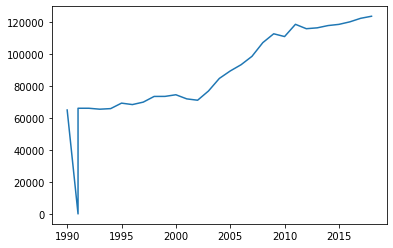

In [293]:
series = diferencia(log)
difreverse(renew['Production (ktoe)'],series).plot()


In [286]:
dickeyF(series)

Results of Dickey-Fuller Test:
Test Statistic                 -3.937605
p-value                         0.001775
#Lags Used                      0.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


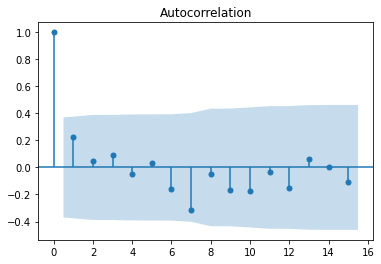

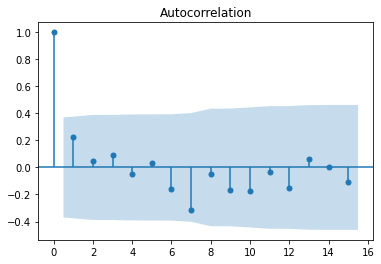

In [287]:
plot_acf(series)

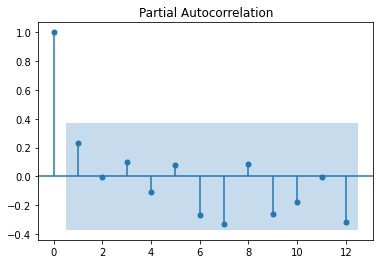

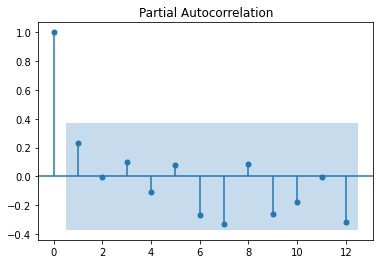

In [288]:
plot_pacf(series, lags = 12)

/home/vitor/Documents/Facu/PER/CDD/Trabalhos/venv/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/vitor/Documents/Facu/PER/CDD/Trabalhos/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarni

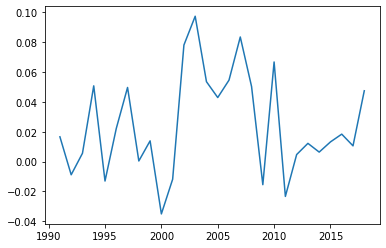

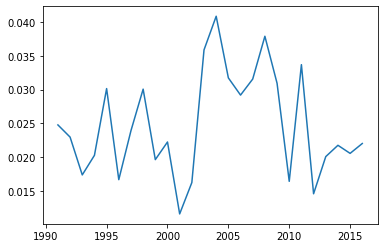

In [296]:
mod = statsmodels.tsa.arima_model.ARIMA(series,order=(2,0,1))
result= mod.fit()

predict = result.predict(start=0,end=25)

series.plot()
plt.show()
predict.plot()
plt.show()

/home/vitor/Documents/Facu/PER/CDD/Trabalhos/venv/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/vitor/Documents/Facu/PER/CDD/Trabalhos/venv/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning

predicted=0.052153, expected=-0.015534
predicted=0.012503, expected=0.066734
predicted=0.080512, expected=-0.023407
predicted=-0.011331, expected=0.004654
predicted=0.022361, expected=0.012170
predicted=-0.001361, expected=0.006311
predicted=0.006764, expected=0.013146
predicted=0.011933, expected=0.018346
predicted=0.014011, expected=0.010500
predicted=0.013132, expected=0.047426
Test RMSE: 0.045


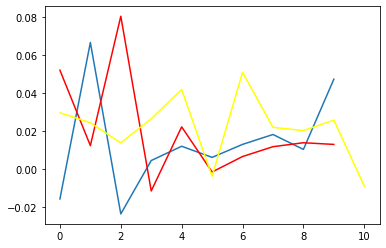

In [290]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
model = ARIMA(history, order=(2,0,1))
model_fit = model.fit()
predt = model_fit.predict(start=0, end= 10)

# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(2,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.plot(predt, color='yellow')
plt.show()

In [291]:
# log.plot()